# Ejercicio de validación de datos

Ahora que conocemos que es el proceso de recolección y validación de datos, vamos a realizar un ejercicio para aplicar lo que hemos visto:

### Preguntas del profesor

1. ¿Que tipo de dato son las variables del conjunto de datos?
2. ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?
3. ¿Cuántas variables y observaciones tenemos en el conjunto de datos?
4. ¿Existen valores nulos explícitos en el conjunto de datos?

In [1]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos crudos

In [3]:
raw_penguins_df = pd.read_csv('dataset/penguins_raw.csv')

### Datos Preprocesados

**NOTA:** Puede que no usemos estos datos

In [4]:
preprocessed_penguins_df = pd.read_csv('dataset/penguins.csv')


#### **Preguntas:**
- ¿Cuantos años en promedio vive un pingüino?
- ¿Las hembras viven mas que los machos?
- ¿Cuál es el rasgo más importante para definir el sexo de un pingüino?
- ¿Existe una relación de tamaño en cuerpo o algún elemento en el pingüino para que sea hembra?
- De esas 3 especies ¿una de ellas es mas grande que las demás?
- ¿Existe una relación entre tamaño y edad?
- ¿En que parte o isla hay una mayor población de pingüinos?
- ¿Existe una relación entre el sexo y el lugar (isla) que predomine? 
- ¿Qué especie es más común?

### ¿Qué tipo de dato son las variables del conjunto de datos?

In [6]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**Tipo de variables:**
- Object: Sinónimo de variables categóricas.
  - species
  - island
  - sex
- float64: Variables numéricas
  - bill_length_mm
  - bill_depth_mm
  - flipper_length_mm
  - body_mass_g
- int64: Variable de tipo numérica
  - year
  
Entonces como se puede ver ya tenemos el tipo de variables que tenemos.

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [5]:
(
    preprocessed_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

El anterior bloque de código nos va a contar cuantos valores de cada tipo de datos tenemos.

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

En un data frame las:
- **variables:** son las columnas
- **observaciones:** son las filas

In [7]:
preprocessed_penguins_df.shape

(344, 8)

Es decir tenemos
- 344 observaciones o filas.
- 8 variables o columnas.

### ¿Existen valores nulos explícitos en el conjunto de datos?

Existe otra funcion para verificar si existen valores nulos y es: `isna()`


In [8]:
(
    preprocessed_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [10]:
(
    preprocessed_penguins_df
    .isna()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

Como se puede observar en el anterior resultado:
- True: Quiere decir que tengo valores nulos en esa columna o variable.
- False: Quiere decir que no tengo valores nulos.

### De tener observaciones con valores nulos, ¿cuántos tenemos por cada variable?

¿Puedo saber si tengo una variable llena de valores nulos? Veamos...


In [12]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
year                  0
dtype: int64

La linea de código anterior me ordena la lista de variables con valores nulos por orden descendente.

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [11]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

Volviendo a llamar la función `sum()`, lo que hago es sumar todos lo valores nulos que existen en mis datos o data set

### ¿Cuál es la proporción de valores nulos por cada variable?

In [16]:
(
    preprocessed_penguins_df
    .isnull()
    .melt()
)

,variable,value
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2747,year,False
2748,year,False
2749,year,False
2750,year,False


Lo qu hace el código anterior es que; colapsa todas las columnas en una sola con sus respectivos valores. Es decir nos dice si hay valores nulos.

#### variable

In [17]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
)

,variable,missing
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2747,year,False
2748,year,False
2749,year,False
2750,year,False


Con la anterior linea de código solo ajustamos el nombre de la columna para el "valor"

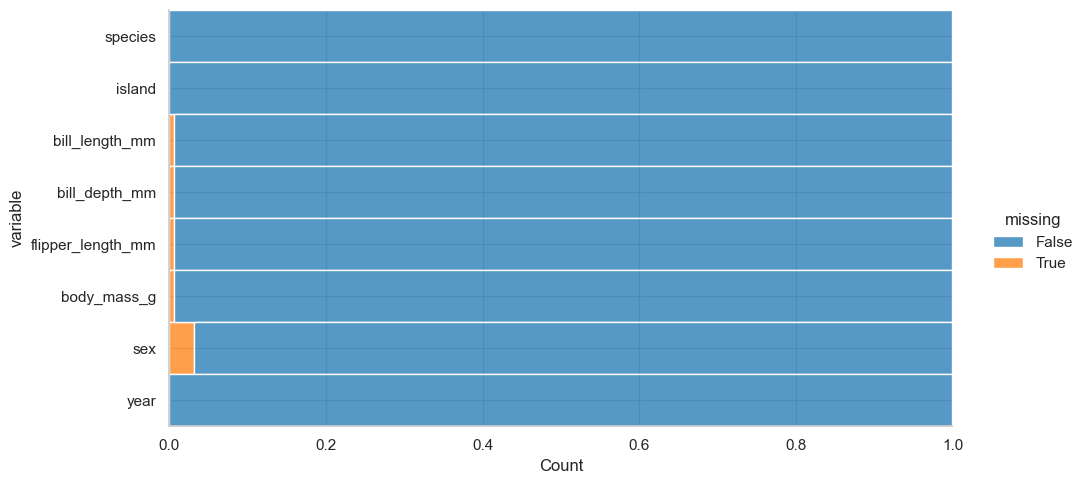

In [19]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<p>Cómo se puede observar en el código anterior,
<a href="#variable">variable</a> es asignada a "y" y se hace una segmentación por medio de hue, con respecto de si existen valores nulo o no, por categoría.
</p>

Algo que podemos hacer para saber la proporción de mis valores nulos con respecto a las variables, es graficar el resultado y ver de manera visual la proporción.

La gráfica anterior es el resultado de hacerlo.

##### **NOTA:**
Para quienes no sabíamos de la existencia de `.pipe()`, lo que hace es Aplicar la función entre paréntesis a mi df, acá se usó para no asignar todo el proceso anterior a una variable, pero podemos tener el mismo resultado si utilizamos el siguiente código para hacer la gráfica de la proporción de valores nulos por variable:

```python
sns.displot(
    preprocess_penguins_df.isna().melt(), y='variable', hue='value', multiple='fill', aspect=2
)
```
>Aporte de Daniel de Jesús Martínez Vega
 
Ademas `pipe()` es proveniente de Pandas.

### ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

Es decir puede que los valores nulos provengan de un solo pingüino así que debemos asegurarnos de saber de donde provienen esos valores nulos.

In [20]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose()
)

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


En el caso anterior tenemos ordenados los datos de manera transpuesta, es decir en las columnas tenemos las **observaciones** y en las filas tenemos las variables.

Ahora para poder observarlo, volvemos a hacer uso de la función `melt()`

<AxesSubplot: >

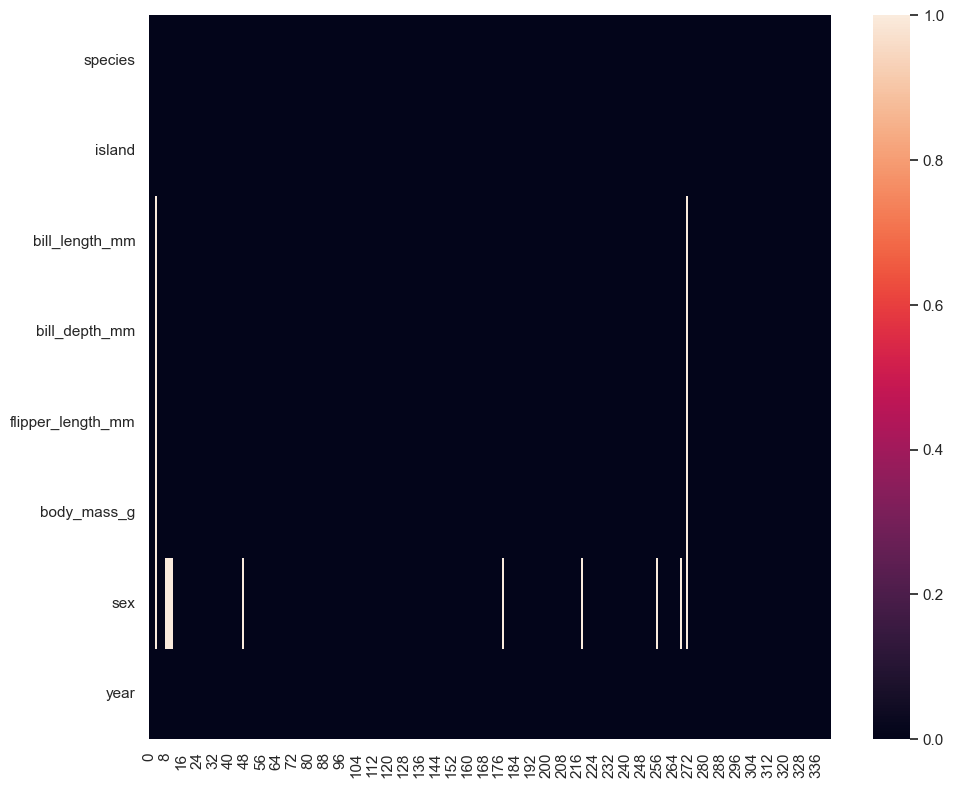

In [21]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

De la anterior gráfica podemos observar que las lineas verticales son una observación por linea, esto quiere decir que a los datos de un pingüino le faltan datos de las variables: bill_length, sex, body_mass, entre otras variables. Este tipo de observación se puede apreciar mejor en la siguiente imagen con recuadros en rojo.

Para el caso del recuadro verde, contiene diferentes observaciones (es decir diferentes pingüinos), pero a todos ellos les falta el dato de la variable "sex".

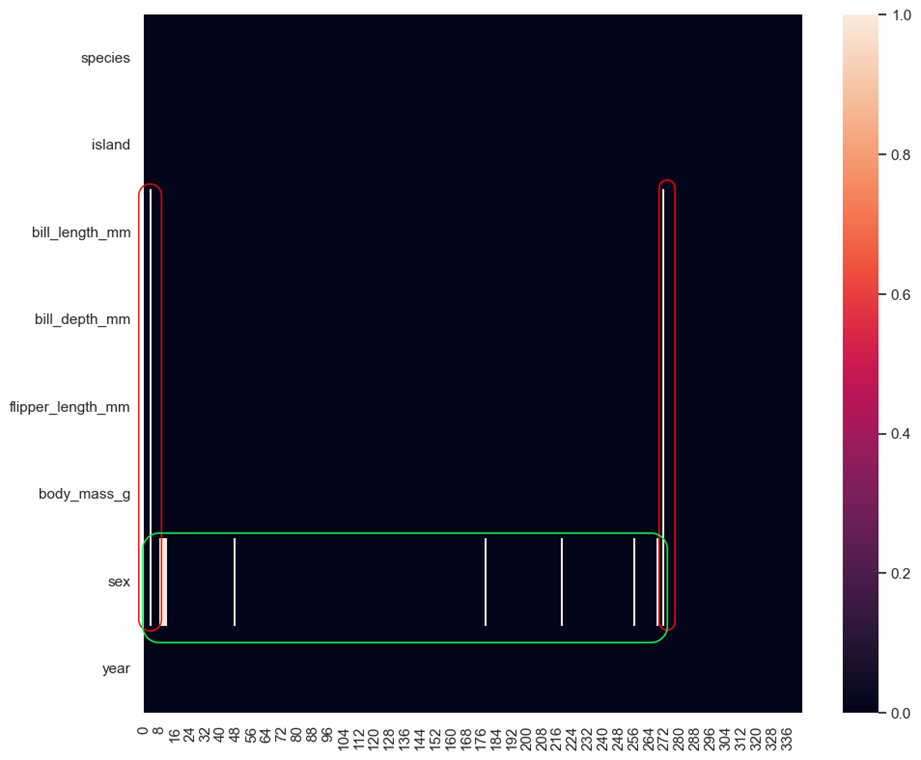

Entonces de acuerdo a las observaciones podemos querer borrarlos, porque no representan una gran cantidad.

En otro tipo de análisis hay que realizar una valoración mas profunda para saber si los podemos borrar, pero para este caso borraremos las observaciones con datos faltantes.

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [26]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df.shape

(333, 8)

Cómo podemos ver cuando borramos los datos nulos perdemos **observaciones o filas**, quedándome con **333**.

In [23]:
preprocessed_penguins_df.shape

(344, 8)

Y sin procesar tenemos **334** **observaciones o filas**, por lo que podemos ver que perdemos **11** observaciones.

#### Listo!! 

Ahora es momento de explorar nuestros datos, y en algún determinado momento regresar a la validación para ver si los datos son correctos o nos estamos perdiendo en algún proceso. 

Recuerda que es importante que el proceso sea cíclico, pero no eterno.

Por último recuerda que podemos aplicar la función `info()` a nuestro DATAFRAME, para obtener un preview de parámetros importantes de nuestro DF.

In [25]:
preprocessed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
